Nama : Nurul Fajriyah Al Maulidiyah

Kode : PYTN-KS14-001

# Statistical Treatment for Retail Dataset (NYC Property Sales)
Kumpulan data ini adalah catatan dari setiap bangunan atau unit bangunan (apartemen, dll.) yang dijual di New York property market selama periode 12 bulan.

## Import library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import math
import statistics
import scipy.stats
import seaborn as sns
import statsmodels.api as sm
from IPython.display import Math, Latex
from IPython.core.display import Image

## Membaca dataset 

In [2]:
df_sales = pd.read_csv('dataset/nyc-rolling-sales.csv')
df_sales

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


**Keterangan**

- `Borough` : kode digit untuk wilayah tempat properti yaitu (1)Manhattan, (2)Bronx, (3)Brooklyn, (4)Queens , dan (5)Staten Island
- `Neighborhood` : assessor departemen keuangan menentukan nama lingkungan dalam proses menilai properti
- `Building Class Category` : bidang yang disertakan agar pengguna Rolling Sales Files dapat dengan mudah mengidentifikasi properti serupa dengan penggunaan luas (mis. Rumah Satu Keluarga)
- `Tax Class at Present` : setiap properti di kota ditetapkan ke salah satu dari empat kelas pajak (kelas 1, 2, 3, dan 4) berdasarkan penggunaan properti
- `Block` : tax block adalah sub-divisi dari borough yang merupakan tempat properti sebenarnya berada
- `Lot` : tax lot adalah subdivisi dari tax block dan mewakili lokasi unik properti
- `Easement` : merupakan hak, seperti hak jalan yang memungkinkan entitas untuk menggunakan properti nyata orang lain secara terbatas
- `Building Class at Present` : klasifikasi bangunan digunakan untuk menggambarkan penggunaan konstruktif properti saat ini
- `Address` : alamat jalan properti seperti yang tercantum di file penjualan
- `Zip Code` : kode pos properti
- `Commercial Unit` : jumlah unit komersial di properti yang terdaftar
- `Total Units` : jumlah total unit di properti yang terdaftar
- `Land Square Feet` : luas tanah properti tercantum dalam kaki persegi
- `Gross Square Feet` : luas total semua lantai bangunan yang diukur dari permukaan luar bangunan, termasuk luas tanah dan ruang di dalam setiap bangunan atau struktur di properti
- `Year Built` : tahun bangunan di properti itu dibangun
- `Building Class at Time of Sale` : klasifikasi bangunan digunakan untuk menggambarkan penggunaan konstruktif properti saat dijual
- `Sales Price` : harga yang dibayarkan untuk properti
- `Sale Date` : tanggal properti terjual

## Data Preprocessing

Menghapus kolom yang tidak diperlukan

In [3]:
df_sales.drop(["Unnamed: 0", "EASE-MENT", "APARTMENT NUMBER", "ADDRESS", "ZIP CODE", "BUILDING CLASS AT PRESENT", "BUILDING CLASS AT TIME OF SALE"], axis=1, inplace=True)

Merubah kode pada kolom `BOROUGH` menjadi nama wilayah sesuai keterangan

In [4]:
df_sales['BOROUGH'] = df_sales.BOROUGH.replace({1:"Manhattan", 2:"Bronx", 3:"Brooklyn", 4:"Queens", 5:"Staten Island"})

Menampilkan 5 data teratas

In [5]:
df_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,5,0,5,1633,6440,1900,2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,28,3,31,4616,18690,1900,2,-,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,16,1,17,2212,7803,1900,2,-,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,10,0,10,2272,6794,1913,2,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,6,0,6,2369,4615,1900,2,8000000,2016-11-17 00:00:00


Menampilkan 5 data terbawah

In [6]:
df_sales.tail()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,2,0,2,2400,2575,1998,1,450000,2016-11-28 00:00:00
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,2,0,2,2498,2377,1998,1,550000,2017-04-21 00:00:00
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,2,0,2,4000,1496,1925,1,460000,2017-07-05 00:00:00
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,0,7,7,208033,64117,2001,4,11693337,2016-12-21 00:00:00
84547,Staten Island,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,0,1,1,10796,2400,2006,4,69300,2016-10-27 00:00:00


Menampilkan jumlah baris dan kolom dari DataFrame

In [7]:
df_sales.shape

(84548, 15)

Menampilkan informasi detail tentang DataFrame seperti jumlah baris data, nama-nama kolom beserta jumlah data dan tipe datanya, dan sebagainya

In [8]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   BOROUGH                    84548 non-null  object
 1   NEIGHBORHOOD               84548 non-null  object
 2   BUILDING CLASS CATEGORY    84548 non-null  object
 3   TAX CLASS AT PRESENT       84548 non-null  object
 4   BLOCK                      84548 non-null  int64 
 5   LOT                        84548 non-null  int64 
 6   RESIDENTIAL UNITS          84548 non-null  int64 
 7   COMMERCIAL UNITS           84548 non-null  int64 
 8   TOTAL UNITS                84548 non-null  int64 
 9   LAND SQUARE FEET           84548 non-null  object
 10  GROSS SQUARE FEET          84548 non-null  object
 11  YEAR BUILT                 84548 non-null  int64 
 12  TAX CLASS AT TIME OF SALE  84548 non-null  int64 
 13  SALE PRICE                 84548 non-null  object
 14  SALE D

Merubah tipe data `LAND SQUARE FEET`, `GROSS SQUARE FEET`, dan `SALE PRICE` dari object ke numeric. Jika ada data yang kosong maka akan diisi dengan angka 0

In [9]:
convert_col = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']

for col in convert_col:
    df_sales[col] = pd.to_numeric(df_sales[col], errors='coerce')

Merubah tipe data dari `TAX CLASS AT PRESENT` dan `TAX CLASS AT TIME OF SALE` menjadi kategorikal

In [10]:
df_sales['TAX CLASS AT TIME OF SALE'] = df_sales['TAX CLASS AT TIME OF SALE'].astype('category')
df_sales['TAX CLASS AT PRESENT'] = df_sales['TAX CLASS AT PRESENT'].astype('category')

Merubah tipe data dari `SALE DATE` menjadi datetime

In [11]:
df_sales['SALE DATE'] = pd.to_datetime(df_sales['SALE DATE'])

Menampilkan tipe data setelah diubah

In [12]:
df_sales.dtypes

BOROUGH                              object
NEIGHBORHOOD                         object
BUILDING CLASS CATEGORY              object
TAX CLASS AT PRESENT               category
BLOCK                                 int64
LOT                                   int64
RESIDENTIAL UNITS                     int64
COMMERCIAL UNITS                      int64
TOTAL UNITS                           int64
LAND SQUARE FEET                    float64
GROSS SQUARE FEET                   float64
YEAR BUILT                            int64
TAX CLASS AT TIME OF SALE          category
SALE PRICE                          float64
SALE DATE                    datetime64[ns]
dtype: object

Menampilkan statistik deskriptif data dalam DataFrame

In [13]:
df_sales.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,5.829600e+04,5.693600e+04,84548.000000,6.998700e+04
mean,4237.218976,376.224015,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1789.322976,1.276456e+06
std,3568.263407,658.136814,16.721037,8.713183,18.972584,4.198397e+04,3.503249e+04,537.344993,1.140526e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1322.750000,22.000000,0.000000,0.000000,1.000000,1.650000e+03,1.046750e+03,1920.000000,2.250000e+05
50%,3311.000000,50.000000,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,1940.000000,5.300000e+05
75%,6281.000000,1001.000000,2.000000,0.000000,2.000000,3.500000e+03,2.560000e+03,1965.000000,9.500000e+05
max,16322.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09


Mengecek apakah ada missing value

In [14]:
df_sales.isnull().sum()

BOROUGH                          0
NEIGHBORHOOD                     0
BUILDING CLASS CATEGORY          0
TAX CLASS AT PRESENT             0
BLOCK                            0
LOT                              0
RESIDENTIAL UNITS                0
COMMERCIAL UNITS                 0
TOTAL UNITS                      0
LAND SQUARE FEET             26252
GROSS SQUARE FEET            27612
YEAR BUILT                       0
TAX CLASS AT TIME OF SALE        0
SALE PRICE                   14561
SALE DATE                        0
dtype: int64

**Handling missing value**

Nilai yang kosong pada kolom `LAND SQUARE FEET`, `GROSS SQUARE FEET`, `YEAR BUILT`, dan `SALE PRICE` akan diubah dengan nilai median dari setiap kolom

In [15]:
df_sales['LAND SQUARE FEET'].fillna(df_sales['LAND SQUARE FEET'].median(), inplace=True)
df_sales['GROSS SQUARE FEET'].fillna(df_sales['GROSS SQUARE FEET'].median(), inplace=True)
df_sales['SALE PRICE'].fillna(df_sales['SALE PRICE'].median(), inplace=True)

In [16]:
median_lsf = df_sales['LAND SQUARE FEET'].median()
median_gsf = df_sales['GROSS SQUARE FEET'].median()
median_sp = df_sales['SALE PRICE'].median()

print("Median dari kolom LAND SQUARE FEET :", median_lsf)
print("Median dari kolom GROSS SQUARE FEET :", median_gsf)
print("Median dari kolom SALE PRICE :", median_sp)

Median dari kolom LAND SQUARE FEET : 2325.0
Median dari kolom GROSS SQUARE FEET : 1680.0
Median dari kolom SALE PRICE : 530000.0


Mengecek kembali apakah masih ada missing value

In [17]:
df_sales.isnull().sum()

BOROUGH                      0
NEIGHBORHOOD                 0
BUILDING CLASS CATEGORY      0
TAX CLASS AT PRESENT         0
BLOCK                        0
LOT                          0
RESIDENTIAL UNITS            0
COMMERCIAL UNITS             0
TOTAL UNITS                  0
LAND SQUARE FEET             0
GROSS SQUARE FEET            0
YEAR BUILT                   0
TAX CLASS AT TIME OF SALE    0
SALE PRICE                   0
SALE DATE                    0
dtype: int64

Setelah melakukan handling missing values, maka tidak ada lagi missing values

Mengecek apakah ada duplikat dalam data dan jumlah value dalam DataFrame

In [18]:
df_sales.duplicated().value_counts()

False    83587
True       961
dtype: int64

Menghapus data duplikat

In [19]:
df_sales.drop_duplicates(inplace=True)

Mereset index

In [20]:
df_sales.reset_index(drop=True, inplace=True)

Menampilkan 5 data teratas setelah dilakukan preprocessing

In [21]:
df_sales.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,5,0,5,1633.0,6440.0,1900,2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,28,3,31,4616.0,18690.0,1900,2,530000.0,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,16,1,17,2212.0,7803.0,1900,2,530000.0,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,10,0,10,2272.0,6794.0,1913,2,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,6,0,6,2369.0,4615.0,1900,2,8000000.0,2016-11-17


- is there a difference in unit sold between property built in 1900-2000 and 2001 so on?
- is there a difference in unit sold based on building category?
- what can you discover about New York City real estate by looking at a year's worth of raw transaction records? can you spot trends in the market?

## Measure of Central Tendency

### Mean

#### Menghitung nilai mean atau rata-rata `SALE PRICE` pada setiap data di kolom `BOROUGH`

In [22]:
mean_price = df_sales.groupby('BOROUGH').agg({'SALE PRICE':np.mean})
mean_price

,SALE PRICE
BOROUGH,
Bronx,5.955543e+05
Brooklyn,8.423449e+05
Manhattan,2.773636e+06
Queens,6.753599e+05
Staten Island,5.398224e+05


Memvisualisasikan nilai mean dengan bar horizontal

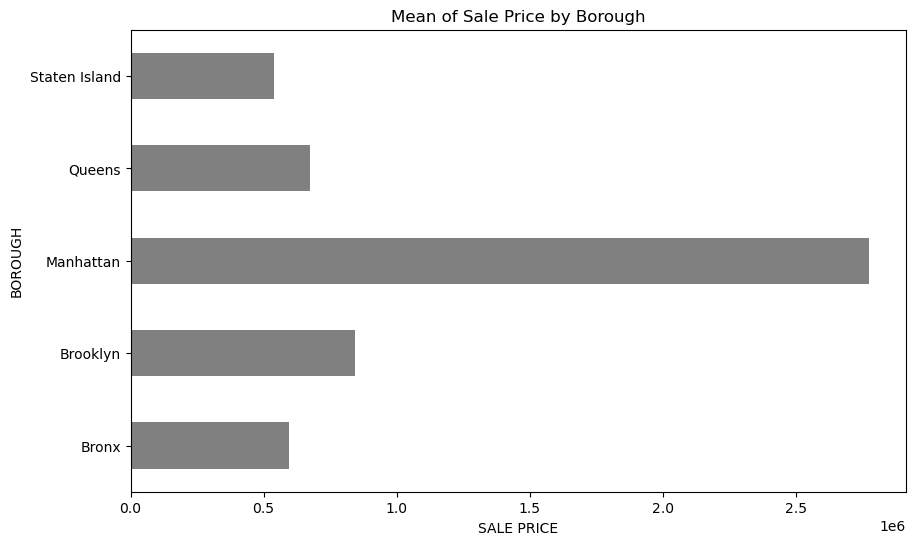

In [23]:
mean_price.plot(kind='barh', 
                color='grey',
                figsize=(10,6), 
                legend = False
               )

plt.title("Mean of Sale Price by Borough")
plt.xlabel("SALE PRICE")
plt.ylabel("BOROUGH")

plt.show()

**Kesimpulan :**

Berdasarkan tabel diatas, dapat diketahui bahwa rata-rata SALE PRICE tertinggi terdapat pada wilayah Brooklyn dengan nilai 	8.590217e+05. Sedangkan rata-rata SALE PRICE terendah terdapat pada wilayah Manhattan dengan nilai 2.831892e+06. 

#### Menghitung nilai mean atau rata-rata pada setiap data numerik berdasarkan kolom `BOROUGH`

In [24]:
mean_num = df_sales.groupby('BOROUGH').mean()
mean_num

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BOROUGH,,,,,,,,,
Bronx,4204.104683,298.958471,3.348418,0.159387,3.514106,3909.008163,4494.309609,1750.280825,5.955543e+05
Brooklyn,4317.978492,339.924092,2.009494,0.145474,2.192187,2012.465406,2478.438941,1767.025625,8.423449e+05
Manhattan,1107.518968,750.958403,2.199501,0.281198,2.520521,2624.832169,4643.633777,1706.044481,2.773636e+06
Queens,6628.573959,230.947798,1.685654,0.190791,1.907721,3616.733550,2703.465476,1852.211226,6.753599e+05
Staten Island,3262.026281,198.796504,1.230259,0.080410,1.313321,7675.834117,2196.219168,1870.193611,5.398224e+05


**Kesimpulan :**

Setiap wilayah memiliki rata-rata tertinggi pada setiap kolom tertentu
- wilayah Bronx memiliki rata-rata tertinggi pada kolom TOTAL UNITS dan RESIDENTIAL UNITS
- wilayah Brooklyn memiliki rata-rata tertinggi pada kolom SALE PRICE
- wilayah Manhattan memiliki rata-rata tertinggi pada kolom LOT dan GROSS SQUARE FEET
- wilayah Queens memiliki rata-rata tertinggi pada kolom BLOCK 
- wilayah Staten Island memiliki rata-rata tertinggi pada kolom COMMERCIAL UNITS, LAND SQUARE FEET, dan YEAR BUILT

### Median

#### Menghitung nilai tengah atau median `SALE PRICE` pada setiap data di kolom `BOROUGH`

In [25]:
median_price = df_sales.groupby('BOROUGH').agg({'SALE PRICE':np.median})
median_price

,SALE PRICE
BOROUGH,
Bronx,275000.0
Brooklyn,429000.0
Manhattan,850000.0
Queens,530000.0
Staten Island,530000.0


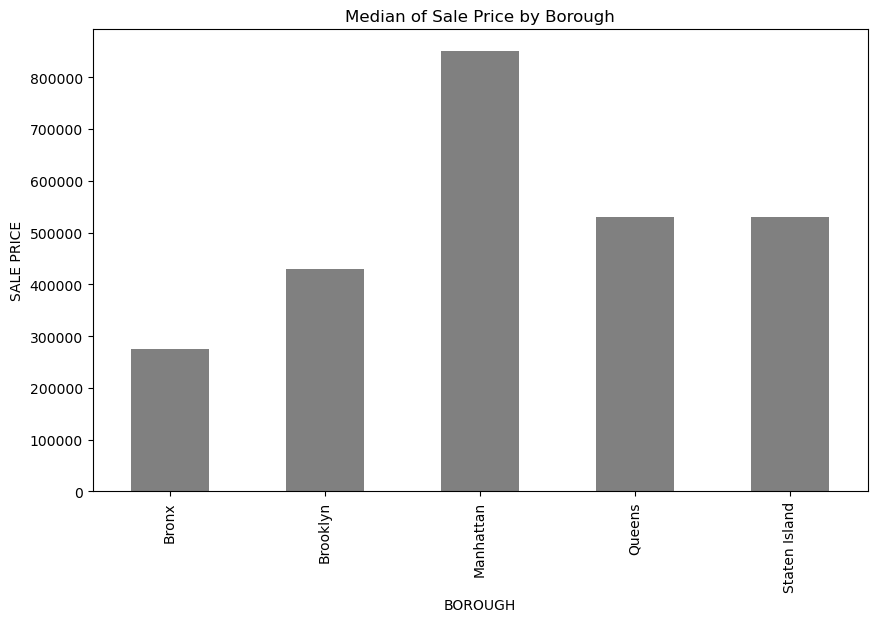

In [26]:
median_price.plot(kind='bar', 
                color='grey',
                figsize=(10,6), 
                legend = False
               )

plt.title("Median of Sale Price by Borough")
plt.xlabel("BOROUGH")
plt.ylabel("SALE PRICE")

plt.show()

**Kesimpulan :**

Berdasarkan tabel diatas, dapat diketahui bahwa median SALE PRICE tertinggi terdapat pada wilayah Manhattan	dengan nilai 875000. Sedangkan median SALE PRICE terendah terdapat pada wilayah Bronx dengan nilai 280000.

#### Menghitung nilai median pada setiap data numerik berdasarkan kolom `BOROUGH`

In [27]:
median_num = df_sales.groupby('BOROUGH').median()
median_num

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BOROUGH,,,,,,,,,
Bronx,4178.0,47.0,1.0,0.0,1.0,2375.0,1764.0,1932.0,275000.0
Brooklyn,4549.0,50.0,1.0,0.0,1.0,1800.0,1520.0,1930.0,429000.0
Manhattan,1170.0,1004.0,0.0,0.0,1.0,2325.0,1680.0,1937.0,850000.0
Queens,5900.0,40.0,1.0,0.0,1.0,2325.0,1680.0,1945.0,530000.0
Staten Island,3024.0,56.0,1.0,0.0,1.0,3206.0,1680.0,1973.0,530000.0


**Kesimpulan :**

Berdasarkan tabel diatas, dapat diketahui bahwa 
- seluruh wilayah memiliki nilai median yang sama pada kolom RESIDENTIAL UNITS dan TOTAL UNITS dengan nilai 1
- nilai median pada kolom COMMERCIAL UNITS di seluruh wilayah yaitu 0
- wilayah Manhattan memiliki nilai median yang tertinggi dan berbeda jauh dengan wilayah lain pada kolom LOT dengan nilai 1007

### Modus

Membuat variabel data_modus yang berisi data dari kolom `BOROUGH`, `NEIGHBORHOOD`, dan `BUILDING CLASS CATEGORY`

In [28]:
data_modus = df_sales.loc[:,['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY']]
data_modus

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS
...,...,...,...
83582,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS
83583,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS
83584,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS
83585,Staten Island,WOODROW,22 STORE BUILDINGS


#### Melihat modus atau nilai yang sering muncul dari variabel 'data_modus'

In [29]:
data_modus.mode()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY
0,Queens,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS


**Kesimpulan**

Berdasarkan data yang didapatkan diatas, maka
- modus dari kolom `BOROUGH` yaitu Queens
- modus dari kolom `NEIGHBORHOOD` yaitu FLUSHING-NORTH
- modus dari kolom `BUILDING CLASS CATEGORY` yaitu 01 ONE FAMILY DWELLINGS

## Measure of Spread

### Range

Membuat variabel 'data_spread' yang berisi nilai mean dari kolom `LAND SQUARE FEET` dan `GROSS SQUARE FEET` berdasarkan `BOROUGH`

In [30]:
data_spread = df_sales[['BOROUGH','LAND SQUARE FEET','GROSS SQUARE FEET']].groupby('BOROUGH').mean()
data_spread

,LAND SQUARE FEET,GROSS SQUARE FEET
BOROUGH,,
Bronx,3909.008163,4494.309609
Brooklyn,2012.465406,2478.438941
Manhattan,2624.832169,4643.633777
Queens,3616.733550,2703.465476
Staten Island,7675.834117,2196.219168


#### Range dari kolom `LAND SQUARE FEET` dan `GROSS SQUARE FEET`

In [31]:
range_lsf = np.ptp(data_spread['LAND SQUARE FEET'])
range_gsf = np.ptp(data_spread['GROSS SQUARE FEET'])

print("Range LAND SQUARE FEET :", range_lsf)
print("Range GROSS SQUARE FEET :", range_gsf)

Range LAND SQUARE FEET : 5663.368710510694
Range GROSS SQUARE FEET : 2447.414608864671


**Kesimpulan**

Berdasarkan data yang didapatkan diatas, maka
- range dari kolom `LAND SQUARE FEET` berdasarkan BOROUGH adalah : 5663.368710510694
- range dari kolom `GROSS SQUARE FEET` berdasarkan BOROUGH adalah : 2447.414608864671

### Variance

Menampilkan data_spread

In [32]:
data_spread

,LAND SQUARE FEET,GROSS SQUARE FEET
BOROUGH,,
Bronx,3909.008163,4494.309609
Brooklyn,2012.465406,2478.438941
Manhattan,2624.832169,4643.633777
Queens,3616.733550,2703.465476
Staten Island,7675.834117,2196.219168


#### Variansi dari kolom `LAND SQUARE FEET` dan `GROSS SQUARE FEET`

In [33]:
variance_lsf = statistics.variance(data_spread['LAND SQUARE FEET'])
variance_gsf = statistics.variance(data_spread['GROSS SQUARE FEET'])

print("Varians LAND SQUARE FEET :", variance_lsf)
print("Varians GROSS SQUARE FEET :", variance_gsf)

Varians LAND SQUARE FEET : 4875779.2776673315
Varians GROSS SQUARE FEET : 1370205.9190301765


**Kesimpulan**

Berdasarkan data yang didapatkan diatas, maka
- varians dari kolom `LAND SQUARE FEET` berdasarkan BOROUGH adalah : 4875779.2776673315
- varians dari kolom `GROSS SQUARE FEET` berdasarkan BOROUGH adalah : 1370205.9190301765

### Standard Deviation

Menampilkan data_spread

In [34]:
data_spread

,LAND SQUARE FEET,GROSS SQUARE FEET
BOROUGH,,
Bronx,3909.008163,4494.309609
Brooklyn,2012.465406,2478.438941
Manhattan,2624.832169,4643.633777
Queens,3616.733550,2703.465476
Staten Island,7675.834117,2196.219168


#### Standard deviasi dari kolom `LAND SQUARE FEET` dan `GROSS SQUARE FEET`

In [35]:
std_lsf = statistics.stdev(data_spread['LAND SQUARE FEET'])
std_gsf = statistics.stdev(data_spread['GROSS SQUARE FEET'])

print("stdev LAND SQUARE FEET :", std_lsf)
print("stdev GROSS SQUARE FEET :", std_gsf)

stdev LAND SQUARE FEET : 2208.1166811713847
stdev GROSS SQUARE FEET : 1170.5579520169758


**Kesimpulan**

Berdasarkan data yang didapatkan diatas, maka
- standard deviasi dari kolom `LAND SQUARE FEET` berdasarkan BOROUGH adalah : 2208.1166811713847
- standard deviasi dari kolom `GROSS SQUARE FEET` berdasarkan BOROUGH adalah : 1170.5579520169758

## Probability Distribution

Membuat variabel df_dist yang berisi kolom `BOROUGH`, `BLOCK`, `LOT`, `SALE PRICE`, `TAX CLASS AT TIME OF SALE`

In [40]:
df_dist = df_sales.loc[:, ['BOROUGH', 'BLOCK', 'LOT', 'SALE PRICE', 'TAX CLASS AT TIME OF SALE']]
df_dist.head()

,BOROUGH,BLOCK,LOT,SALE PRICE,TAX CLASS AT TIME OF SALE
0,Manhattan,392,6,6625000.0,2
1,Manhattan,399,26,530000.0,2
2,Manhattan,399,39,530000.0,2
3,Manhattan,402,21,3936272.0,2
4,Manhattan,404,55,8000000.0,2


#### Histogram untuk menampilkan probability distribution dari df_dist

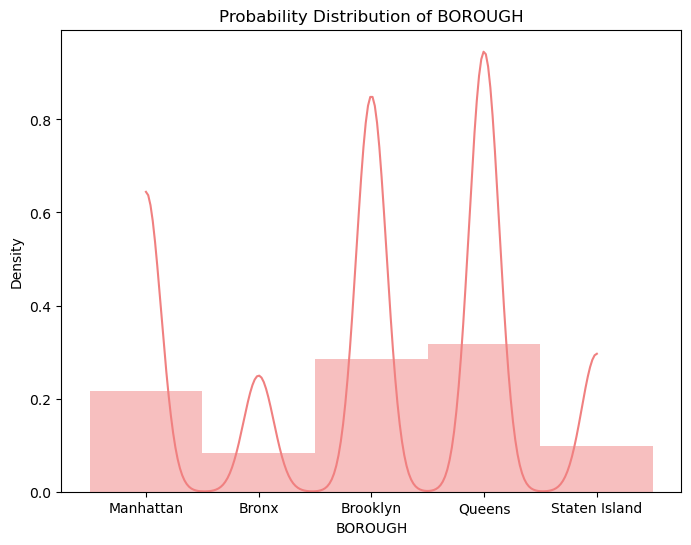

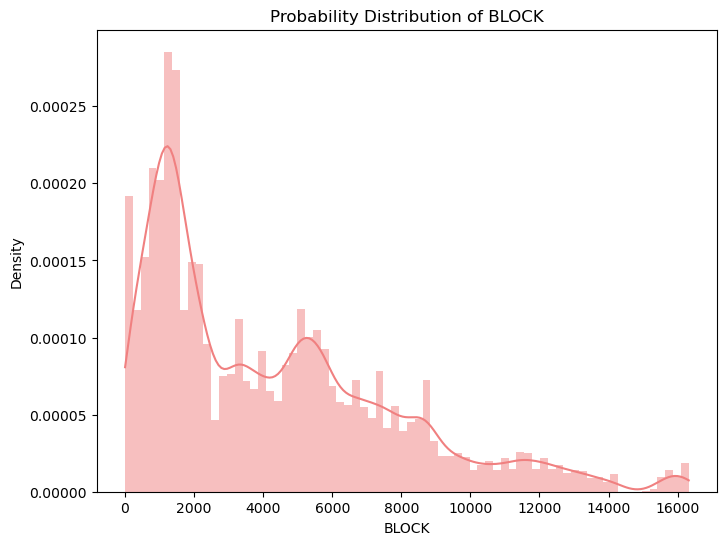

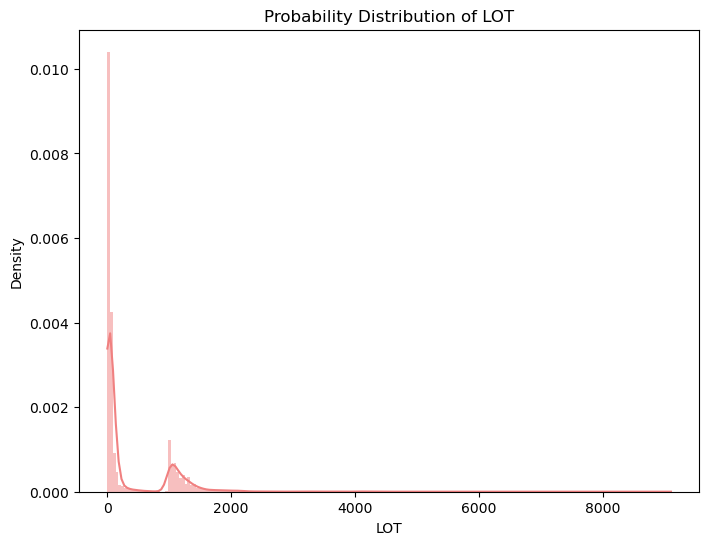

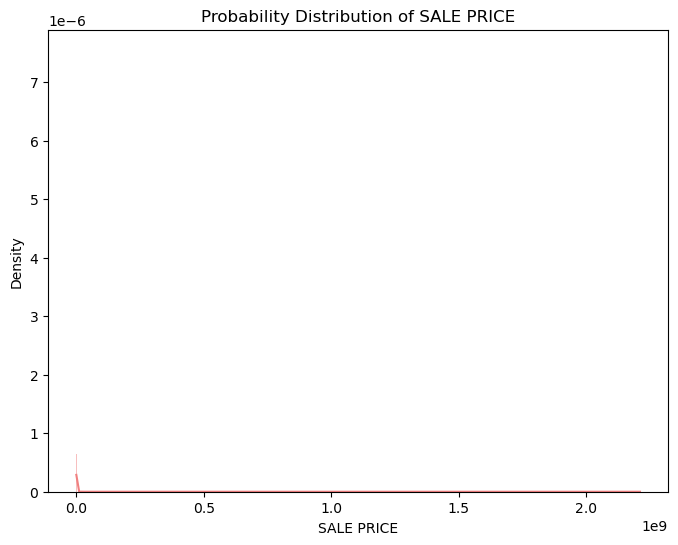

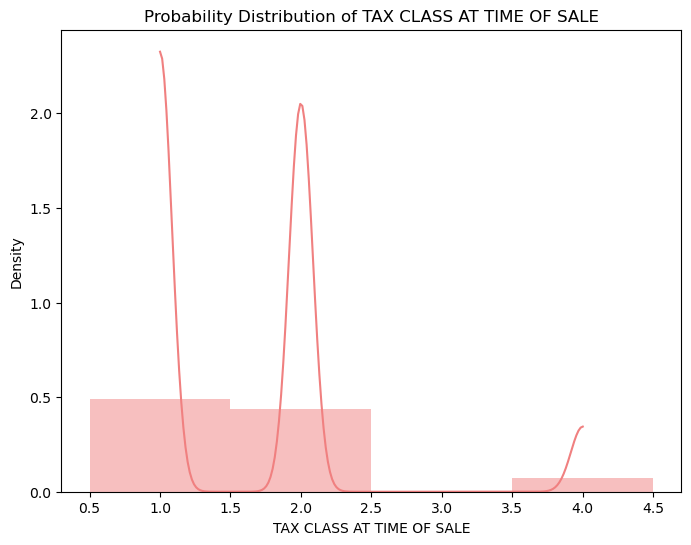

In [41]:
for col in df_dist:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df_dist, x=col, kde=True, stat="density", linewidth=0, color='lightcoral')
    plt.title("Probability Distribution of {}".format(col))
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

**Kesimpulan**

Berdasarkan tampilan histogram diatas, maka dapat disimpulkan bahwa
- kolom LOT dan SALE PRICE berdistribusi eksponensial
- kolom BOROUGH, BLOCK, dan TAX CLASS AT TIME OF SALE berdistribusi gamma

## Confidence Intervals

### Calculation CI of Mean

#### Menghitung CI untuk mean SALE PRICE pada wilayah Brooklyn

Membuat df_CI yang menampilkan nilai mean, std, dan size dari `SALE PRICE`

In [42]:
CI_mean = df_sales.groupby('BOROUGH').agg({'SALE PRICE': [np.mean, np.std, np.size]})
CI_mean

SALE PRICE                     
                       mean           std   size
BOROUGH                                         
Bronx          5.955543e+05  2.795621e+06   6983
Brooklyn       8.423449e+05  3.954935e+06  23805
Manhattan      2.773636e+06  2.158396e+07  18030
Queens         6.753599e+05  2.693043e+06  26474
Staten Island  5.398224e+05  1.618722e+06   8295

Mengekstrak parameter yang diperlukan (menggunakan data pada wilayah Brooklyn)

z-score yang digunakan adalah 1.96 untuk confidence interval 95%

In [43]:
mean_sp = CI_mean.iloc[1,0]
sd = CI_mean.iloc [1,1]
n = CI_mean.iloc [1,2]         
z = 1.96  

Menghitung standard error dari sample mean menggunakan rumus:

<img src="https://i.ibb.co/DgFTNrm/s10-09.png" width="500" align="center">

In [44]:
se = sd / np.sqrt(n)
se

25633.342750683118

Menghitung lower limit dan upper limit dari CI

In [45]:
lcb = mean_sp - z * se
ucb = mean_sp + z * se
lcb, ucb

(792103.5695697197, 892586.2731523975)

**Kesimpulan**

- Standard error untuk mean yaitu 25633.342750683118
- Upper limit dari CI yaitu 892586.2731523975
- Lower limit dari CI yaitu 792103.5695697197
- Rata-rata sebenarnya dari SALE PRICE di wilayah Brooklyn akan jatuh antara 792103.5695697197 dan 892586.2731523975

### Calculation of CI for Population Proportion

#### CI for Population Proportion Bangunan di Manhattan dengan Pajak Tingkat 1

Membuat variabel df_tax yang berisi kolom `TAX CLASS AT TIME OF SALE` dan `BOROUGH`

In [46]:
df_tax = df_sales.loc[:,['TAX CLASS AT TIME OF SALE', 'BOROUGH']]
df_tax.head()

,TAX CLASS AT TIME OF SALE,BOROUGH
0,2,Manhattan
1,2,Manhattan
2,2,Manhattan
3,2,Manhattan
4,2,Manhattan


Mengganti nama kolom menjadi `tax` dan `wilayah`

In [47]:
df_tax.rename(columns={'TAX CLASS AT TIME OF SALE':'tax', 'BOROUGH':'wilayah'}, inplace=True)
df_tax.columns

Index(['tax', 'wilayah'], dtype='object')

Menampilkan jumlah bangunan di seluruh wilayah pada setiap tingkatan pajak

In [48]:
pd_cross = pd.crosstab(df_tax.tax, df_tax.wilayah)
pd_cross

wilayah,Bronx,Brooklyn,Manhattan,Queens,Staten Island
tax,,,,,
1,4365,12556,347,16367,7519
2,2095,9027,16422,8370,425
3,2,0,1,0,0
4,521,2222,1260,1737,351


Membuat variabel 'queens' yang berisi jumlah bangunan di wilayah Queens dengan tingkat pajak 1  

In [49]:
queens = pd_cross.Queens[1]
queens

16367

Bangunan di wilayah Queens dengan tingkat pajak 1 berjumlah 16367

Menghitung jumlah bangunan di wilayah Queens

In [50]:
n = pd_cross.Queens.sum()
n

26474

Menghitung proporsi bangunan di wilayah Queens dengan tingkat pajak 1

In [51]:
p_queens = queens/n
p_queens

0.6182292060134471

Menghitung standard error dari population proportion dengan rumus:

<img src="https://i.ibb.co/JKJwgpJ/s10-08.png" width="500" align="center">

In [52]:
se_queens = np.sqrt(p_queens * (1-p_queens)/n)
se_queens

0.002985838593877589

z-score yang digunakan adalah 1.96 untuk confidence interval 95%

In [53]:
z_score = 1.96

# menghitung CI menggunakan library statsmodel
sm.stats.proportion_confint(n*p_queens, n)

(0.6123770699057973, 0.6240813421210969)

**Kesimpulan**

- Proporsi bangunan di wilayah Queens dengan tingkat pajak 1 yaitu 0.6182292060134471
- Standard error dari population proportion yaitu 0.002985838593877589
- Upper limit dari CI yaitu 0.6123770699057973
- Lower limit dari CI yaitu 0.6240813421210969
- Rata-rata sebenarnya dari proporsi bangunan di wilayah Queens dengan tingkat pajak 1 akan jatuh antara 0.6123770699057973 dan 0.6240813421210969

## Hypothesis Testing

### Difference in Population Means

#### Apakah rata-rata sale price di Manhattan lebih besar daripada wilayah Bronx?

Membuat variabel manhattan dan bronx

In [70]:
manhattan = df_sales[df_sales['BOROUGH'] == 'Manhattan']
bronx = df_sales[df_sales['BOROUGH'] == 'Bronx']

Menghitung nilai mean dan standard deviasi dari 'manhattan' dan 'bronx'

In [74]:
n1 = len(manhattan)
m1 = manhattan['SALE PRICE'].mean()
sd1 = manhattan['SALE PRICE'].std()

print("-----MANHATTAN-----")
print("Total data :", n1)
print("Nilai mean :", m1)
print("Nilai standard deviasi :", sd1)

-----MANHATTAN-----
Total data : 18030
Nilai mean : 2773636.009927898
Nilai standard deviasi : 21583957.7143914


In [75]:
n2 = len(bronx)
m2 = bronx['SALE PRICE'].mean()
sd2 = bronx['SALE PRICE'].std()

print("-----BRONX-----")
print("Total data :", n2)
print("Nilai mean :", m2)
print("Nilai standard deviasi :", sd2)

-----BRONX-----
Total data : 6983
Nilai mean : 595554.3127595589
Nilai standard deviasi : 2795620.618749152


Menghitung nilai z-test 

menggunakan alternative='two-sided' untuk memeriksa ketidaksamaan

In [76]:
sm.stats.ztest(manhattan['SALE PRICE'].dropna(), 
               bronx['SALE PRICE'].dropna(),
               alternative='two-sided'
              )

(8.405287573047548, 4.268144482554359e-17)

Memplot histogram untuk memeriksa apakah distibusinya mengikuti distribusi normal

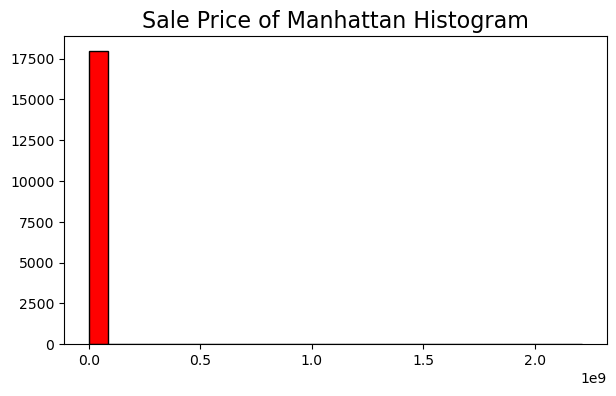

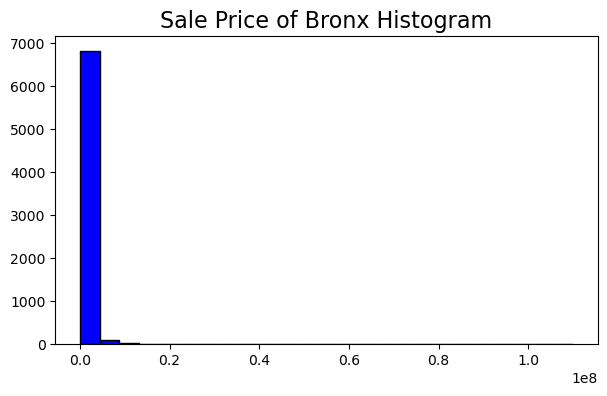

In [78]:
plt.figure(figsize=(7,4))
plt.title("Sale Price of Manhattan Histogram",fontsize=16)
plt.hist(manhattan['SALE PRICE'].dropna(), edgecolor='k',color='red',bins=25)
plt.show()

plt.figure(figsize=(7,4))
plt.title("Sale Price of Bronx Histogram",fontsize=16)
plt.hist(bronx['SALE PRICE'].dropna(), edgecolor='k',color='blue',bins=25)
plt.show()

**Kesimpulan**

Berdasarkan data yang didapatkan diatas, maka dapat disimpulkan bahwa
- population = sale price pada dataset NYC property data
- parameter of interest = m1, m2, sale price
- H0 = rata-rata harga jual di wilayah Manhattan **sama** dengan rata-rata harga jual di wilayah Bronx
- H1 = rata-rata harga jual di wilayah Manhattan **tidak sama** dengan rata-rata harga jual di wilayah Bronx
- data yang didapatkan:
  - **MANHATTAN**
  - Total data : 18030
  - Nilai mean : 2773636.009927898
  - Nilai standard deviasi : 21583957.7143914
  - **BRONX**
  - Total data : 6983
  - Nilai mean : 595554.3127595589
  - Nilai standard deviasi : 2795620.618749152
- hasil ztest = (8.405287573047548, 4.268144482554359e-17)  
- karena p-value (4.26e-17) sangat kecil, maka keputusannya adalah menolak H0 dan menerima H1
- rata-rata harga jual di wilayah Manhattan tidak sama dengan rata-rata harga jual di wilayah Bronx
- berdasarkan histogram yang didapatkan,  hasilnya tidak berdistribusi normal

___